In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: AP
Digite os 2 primeiros digitos do shapefile: 16


# Importando o shapefile

In [4]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 14 columns):
ID            827 non-null int64
CD_GEOCODI    827 non-null object
TIPO          827 non-null object
CD_GEOCODB    490 non-null object
NM_BAIRRO     490 non-null object
CD_GEOCODS    827 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    827 non-null object
NM_DISTRIT    827 non-null object
CD_GEOCODM    827 non-null object
NM_MUNICIP    827 non-null object
NM_MICRO      827 non-null object
NM_MESO       827 non-null object
geometry      827 non-null object
dtypes: int64(1), object(13)
memory usage: 90.5+ KB


In [5]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [6]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [7]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(810, 13)

In [8]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,160005505000001,512,1869,"3,65","3,7","1385,78","5951835,82","1627,34","6597695,93","856,89","3392929,92","1446,06","4875563,86"
1,160005505000003,215,882,"4,1","5,04","522,69","279160,44",698,"250244,78","262,29","200747,03","619,97","252936,95"
2,160005505000004,180,696,"3,87","5,66","617,82","375500,12","766,95","351598,12","325,35","250568,73","639,97","291680,7"
3,160005510000001,187,704,"3,76","3,48","560,2","404041,72","737,73","401093,32","416,8","390430,5","766,33","450197,44"
4,160005510000002,52,217,"4,17","4,66","360,48","135013,9","506,62","115174,96","223,86","147176,23","580,63","175024,14"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [9]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [10]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [11]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 26 columns):
ID            810 non-null int64
CD_GEOCODI    810 non-null int64
TIPO          810 non-null object
CD_GEOCODB    490 non-null object
NM_BAIRRO     490 non-null object
CD_GEOCODS    810 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    810 non-null object
NM_DISTRIT    810 non-null object
CD_GEOCODM    810 non-null object
NM_MUNICIP    810 non-null object
NM_MICRO      810 non-null object
NM_MESO       810 non-null object
geometry      810 non-null object
V001          810 non-null int64
V002          810 non-null int64
V003          810 non-null object
V004          810 non-null object
V005          810 non-null object
V006          810 non-null object
V007          810 non-null object
V008          810 non-null object
V009          810 non-null object
V010          810 non-null object
V011          810 non-null object
V012          810 non-null object
dtypes: i

In [12]:
del gdf
del dados

Text(0.5,1,'AP')

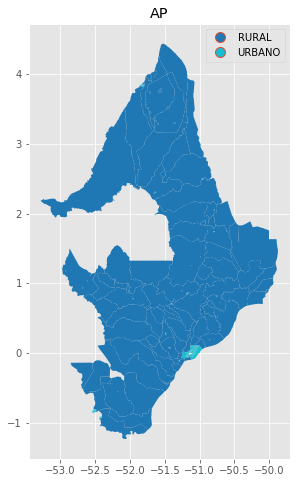

In [13]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [14]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [15]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [16]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [17]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [18]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
5292,Serra do Navio,AP,1.120,1600055.0,(POLYGON ((-52.01891384638251 0.87743764728539...,1.119841
5418,AmapÃ¡,AP,2.438,1600105.0,(POLYGON ((-49.93823481267396 1.68042346523983...,2.437974
5419,Pedra Branca do Amapari,AP,2.397,1600154.0,POLYGON ((-51.96358085893423 0.776884829512105...,2.396740
5420,CalÃ§oene,AP,2.944,1600204.0,(POLYGON ((-51.63236372986182 2.31274914419488...,2.943744
5421,Cutias,AP,0.751,1600212.0,POLYGON ((-50.80716175768303 0.975413347963733...,0.751165


In [19]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16 entries, 5292 to 5433
Data columns (total 6 columns):
Municipio     16 non-null object
UF            16 non-null object
Area_Urb      16 non-null float64
CD_GEOCODM    16 non-null int64
geometry      16 non-null object
Area          16 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 896.0+ bytes


In [20]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no AP')

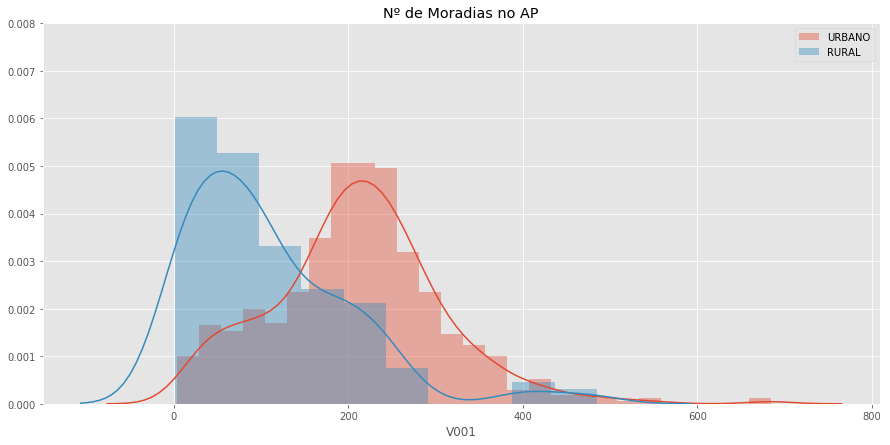

In [21]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [22]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    137.000000
mean     109.313869
std       96.459131
min        1.000000
25%       37.000000
50%       86.000000
75%      165.000000
max      485.000000
Name: V001, dtype: float64
URBANO 
 count    673.000000
mean     209.967311
std       98.634466
min        4.000000
25%      152.000000
50%      211.000000
75%      265.000000
max      685.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

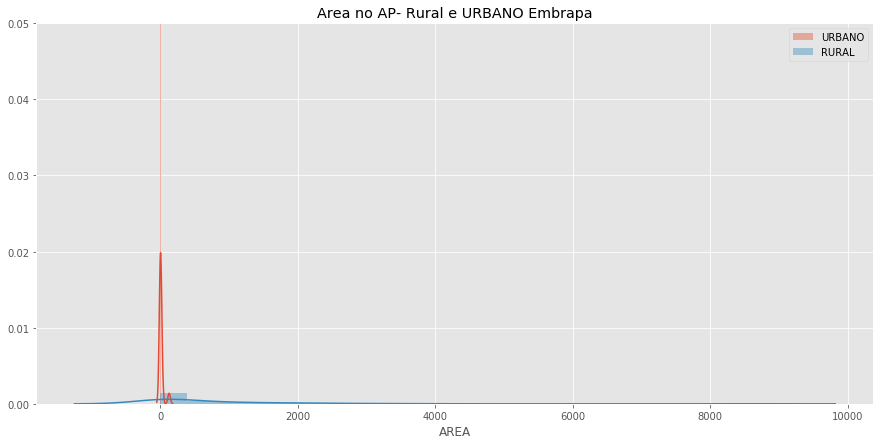

In [23]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [24]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

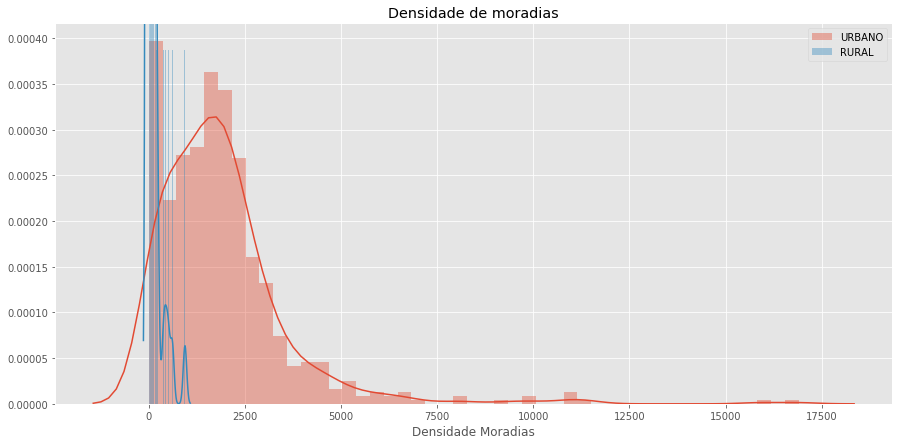

In [25]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [26]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    137.000000
mean      45.792031
std      122.498856
min        0.000478
25%        0.102882
50%        0.455320
75%       25.497175
max      943.035192
Name: Densidade Moradias, dtype: float64
URBANO 
 count      673.000000
mean      1901.767073
std       1770.239360
min          0.991245
25%        781.117751
50%       1657.570069
75%       2389.517707
max      16902.016575
Name: Densidade Moradias, dtype: float64


In [27]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


## Descrição da área por setor censitários urbanos e rurais

In [28]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     16.000000
mean      12.385346
std       31.418716
min        0.728799
25%        1.646427
50%        2.690859
75%        5.754668
max      128.136741
Name: Area, dtype: float64
RURAL 
 count     137.000000
mean      711.908386
std      1118.692559
min         0.065745
25%         1.650926
50%       238.546723
75%      1038.916117
max      8567.795965
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

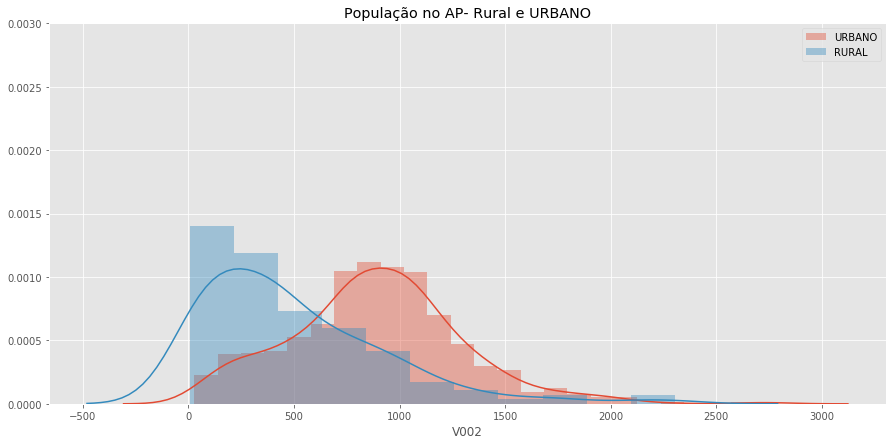

In [29]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [30]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count     137.000000
mean      494.912409
std       436.702087
min         7.000000
25%       151.000000
50%       392.000000
75%       724.000000
max      2304.000000
Name: V002, dtype: float64
URBANO 
 count     673.000000
mean      888.301634
std       410.693088
min        27.000000
25%       632.000000
50%       883.000000
75%      1120.000000
max      2790.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [31]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [32]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [33]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
if scrcu['ID'].count()>0:
    plt.style.use('ggplot')
    scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
    plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


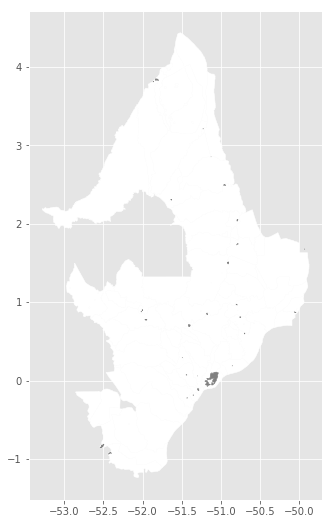

In [35]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [36]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [37]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [38]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

In [39]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [40]:
regioes_urbanas_df.head()

,geometry,FONTE
5292,(POLYGON ((-52.01891384638251 0.87743764728539...,0.0
5418,(POLYGON ((-49.93823481267396 1.68042346523983...,0.0
5419,POLYGON ((-51.96358085893423 0.776884829512105...,0.0
5420,(POLYGON ((-51.63236372986182 2.31274914419488...,0.0
5421,POLYGON ((-50.80716175768303 0.975413347963733...,0.0


In [41]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [42]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [43]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
